In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [22]:
customers = pd.read_csv(r"./Customers.csv")
products = pd.read_csv(r"./Products.csv")
transactions = pd.read_csv(r"./Transactions.csv")

In [23]:
df = pd.merge(transactions, customers, on='CustomerID')
df = pd.merge(df, products, on='ProductID')
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [24]:
features = df.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Price_x': 'mean',
    'Region' : 'first'
}).reset_index()

In [25]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features[['TotalValue', 'Quantity', 'Price_x']])

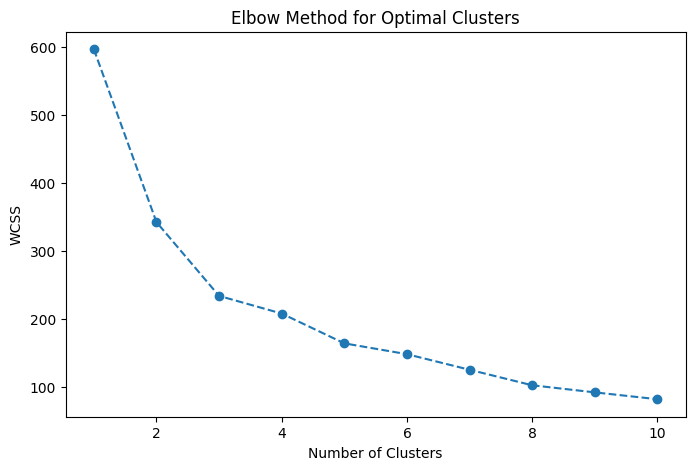

In [26]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

In [28]:
features['Cluster'] = clusters

In [29]:
db_index = davies_bouldin_score(features_scaled, clusters)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.95227765676549


In [30]:
print(features)

    CustomerID  TotalValue  Quantity     Price_x         Region  Cluster
0        C0001     3354.52        12  278.334000  South America        1
1        C0002     1862.74        10  208.920000           Asia        2
2        C0003     2725.38        14  195.707500  South America        2
3        C0004     5354.88        23  240.636250  South America        0
4        C0005     2034.24         7  291.603333           Asia        1
..         ...         ...       ...         ...            ...      ...
194      C0196     4982.88        12  416.992500         Europe        1
195      C0197     1928.65         9  227.056667         Europe        2
196      C0198      931.83         3  239.705000         Europe        2
197      C0199     1979.28         9  250.610000         Europe        2
198      C0200     4758.60        16  296.506000           Asia        0

[199 rows x 6 columns]


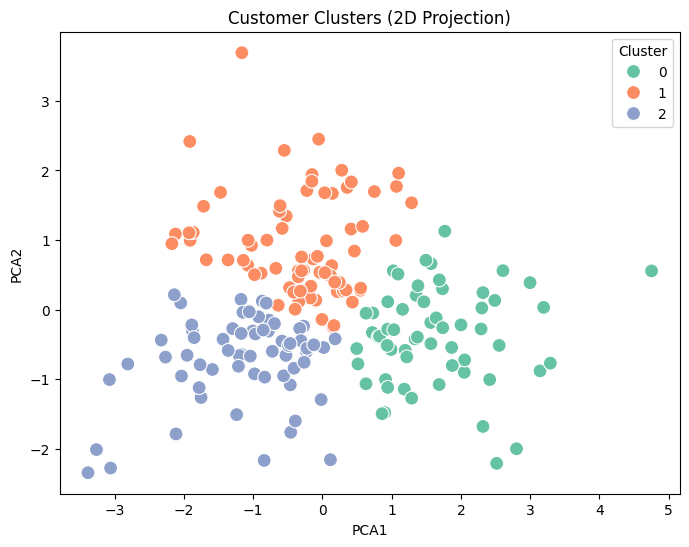

In [31]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)
features['PCA1'] = pca_result[:, 0]
features['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=features, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title("Customer Clusters (2D Projection)")
plt.show()